# 6.4. Supervised Machine Learning: Regression

## This script contains:
### 1. Importing libraries and data
### 2. Data Cleaning
### 3. Data prep for regression analysis & Regression Analysis

# 1. Importing Libraries & Data

## Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data

In [2]:
# create path
path = r'C:\Users\M de Villiers\Desktop\Data Analytics\Achievement 6\02_Data\Prepared_Data'

In [3]:
# Import data
df= pd.read_csv(os.path.join(path, 'FINAL_COVID_19_DATA1.csv'), index_col = False)

In [4]:
df.head()

,country,iso_code,month_year,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,monthly_vaccinations_raw,monthly_vaccinations,total_vaccinations_per_hundred,...,people_fully_vaccinated_per_hundred,monthly_vaccinations_per_million,continent,population,new_cases,total_cases,new_deaths,total_deaths,%deaths,%cases
0,Afghanistan,AFG,2021-02,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",8200,8200,0,0,8202,0.02,...,0.00,204,Asia,39835428,691,55714,43,2443,0.006133,0.139860
1,Afghanistan,AFG,2021-03,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",54000,54000,0,0,85894,0.14,...,0.00,2154,Asia,39835428,740,56454,41,2484,0.006236,0.141718
2,Afghanistan,AFG,2021-04,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",240000,240000,0,0,219606,0.60,...,0.00,5511,Asia,39835428,3291,59745,141,2625,0.006590,0.149980
3,Afghanistan,AFG,2021-05,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",600152,480226,119926,2859,285838,1.51,...,0.30,7171,Asia,39835428,12093,71838,319,2944,0.007390,0.180337
4,Afghanistan,AFG,2021-06,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",886854,699200,187654,4015,242899,2.23,...,0.47,6097,Asia,39835428,46821,118659,1927,4871,0.012228,0.297873


In [5]:
df.tail()

,country,iso_code,month_year,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,monthly_vaccinations_raw,monthly_vaccinations,total_vaccinations_per_hundred,...,people_fully_vaccinated_per_hundred,monthly_vaccinations_per_million,continent,population,new_cases,total_cases,new_deaths,total_deaths,%deaths,%cases
5463,Zimbabwe,ZWE,2020-09,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,1341,7838,26,228,0.001511,0.051934
5464,Zimbabwe,ZWE,2020-10,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,529,8367,15,243,0.001610,0.055439
5465,Zimbabwe,ZWE,2020-11,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,1583,9950,33,276,0.001829,0.065928
5466,Zimbabwe,ZWE,2020-12,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,3917,13867,87,363,0.002405,0.091882
5467,Zimbabwe,ZWE,2021-01,0,0,0,0,0,0,0.0,...,0.0,0,Africa,15092171,19521,33388,854,1217,0.008064,0.221227


In [6]:
df.shape

(5468, 21)

# 2. Data Cleaining


### Changeing datatype and dropping columns for potential regression analysis
I wanted delete rows that would only have data on covid cases and deaths and not vaccinations. I think it would make sense to only analyse the years (2021 and 2022) that contains information about both, since covid started in 2019 and vaccinations only in December 2020.

In [7]:
df['month_year'].astype(str)

0       2021-02
1       2021-03
2       2021-04
3       2021-05
4       2021-06
         ...   
5463    2020-09
5464    2020-10
5465    2020-11
5466    2020-12
5467    2021-01
Name: month_year, Length: 5468, dtype: object

In [8]:
df1=df.drop(df[df['month_year'].isin(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11'])].index)

In [9]:
df1.shape #It seems this new dataset does not have enough rows to do the analysis

(3518, 21)

### Although this dataset is too small, I still tried the linear regression on it but I did not discuss the results since it was not much different from the results of the full dataset.

C:\Users\M de Villiers\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_cases', ylabel='Density'>

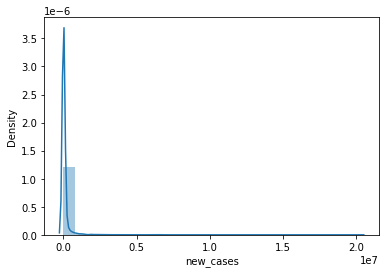

In [10]:
sns.distplot(df['new_cases'], bins=25) # Shows extreme values

# 3. Data Prep & Regression Analysis

### Total Vaccinations vs New Deaths

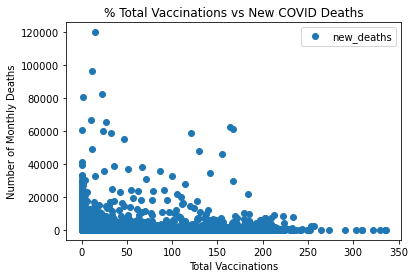

In [7]:
# Scatterplot
df.plot(x = 'total_vaccinations_per_hundred', y='new_deaths',style='o')
plt.title('% Total Vaccinations vs New COVID Deaths')  
plt.xlabel('Total Vaccinations')  
plt.ylabel('Number of Monthly Deaths')  
plt.show()

## Hypothesis 1: The more vaccinations are administered, the less monthly deaths will be reported.

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['total_vaccinations_per_hundred'].values.reshape(-1,1)
y = df['new_deaths'].values.reshape(-1,1)

In [9]:
X

array([[0.02],
       [0.14],
       [0.6 ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [10]:
y

array([[ 43],
       [ 41],
       [141],
       ...,
       [ 33],
       [ 87],
       [854]], dtype=int64)

In [11]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Create a regression object.
regression = LinearRegression()

In [13]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

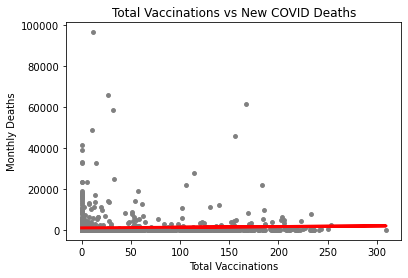

In [15]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Vaccinations vs New COVID Deaths')
plot_test.xlabel('Total Vaccinations')
plot_test.ylabel('Monthly Deaths')
plot_test.show()

In [23]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [25]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.21706398]]
Mean squared error:  26024121.32071793
R2 score:  6.312263641361504e-05


In [26]:
y_predicted

array([[ 991.68604457],
       [1248.15038537],
       [1081.08825268],
       ...,
       [ 991.68604457],
       [ 991.68604457],
       [1289.6826814 ]])

In [27]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,662,991.686045
1,178,1248.150385
2,4,1081.088253
3,0,1147.906672
4,88,991.686045
5,0,991.686045
6,489,1196.323485
7,0,1056.445543
8,25,1312.491665
9,1998,991.686045


In [20]:
#Compare how the regression fits the training set
y_predicted_train = regression.predict(X_train)

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.21706398]]
Mean squared error:  24265383.708517607
R2 score:  0.0014500179563690097


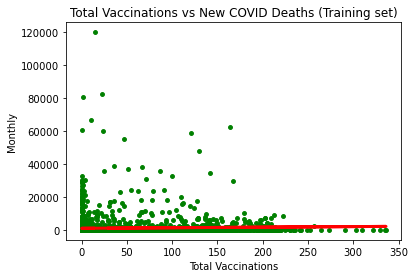

In [36]:
# Visualizing the training set results.
plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_train.title('Total Vaccinations vs New COVID Deaths (Training set)')
plot_train.xlabel('Total Vaccinations')
plot_train.ylabel('Monthly')
plot_train.show()

### Total Vaccinations & New cases

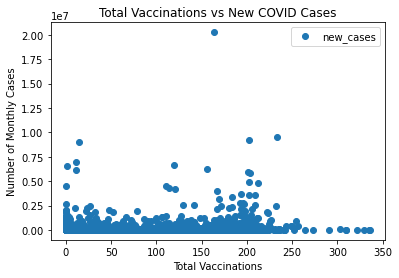

In [28]:
# Scatterplot1
df.plot(x = 'total_vaccinations_per_hundred', y='new_cases',style='o')
plt.title('Total Vaccinations vs New COVID Cases')  
plt.xlabel('Total Vaccinations')  
plt.ylabel('Number of Monthly Cases')  
plt.show()

## Hypothesis 2: The more vaccinations are administered, the less monthly cases will be reported.

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X1 = df['total_vaccinations_per_hundred'].values.reshape(-1,1)
y1 = df['new_cases'].values.reshape(-1,1)

In [30]:
# Split data into a training set and a test set.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [31]:
# Fit the regression object onto the training set.
regression.fit(X_train1, y_train1)

LinearRegression()

In [32]:
# Predict the values of y using X.
y_predicted1 = regression.predict(X_test1)

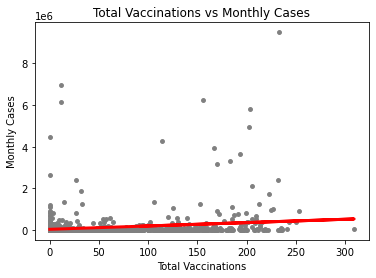

In [33]:
# Create a plot that shows the regression line from the model on the test set.
plot_test1 = plt
plot_test1.scatter(X_test1, y_test1, color='gray', s = 15)
plot_test1.plot(X_test1, y_predicted1, color='red', linewidth =3)
plot_test1.title('Total Vaccinations vs Monthly Cases')
plot_test1.xlabel('Total Vaccinations')
plot_test1.ylabel('Monthly Cases')
plot_test1.show()

In [34]:
# Create objects that contain the model summary statistics.
rmse1 = mean_squared_error(y_test1, y_predicted1)
r2_1 = r2_score(y_test1, y_predicted1)

In [36]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[1608.18630895]]
Mean squared error:  240993114226.52667
R2 score:  0.0441584694319036


In [37]:
y_predicted1

array([[ 29628.97217705],
       [157833.5847268 ],
       [ 74320.46970286],
       ...,
       [ 29628.97217705],
       [ 29628.97217705],
       [178595.26997539]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.
data1 = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_predicted1.flatten()})
data1.head(30)

,Actual,Predicted
0,65907,29628.972177
1,21517,157833.584727
2,4178,74320.469703
3,1,107722.499340
4,13875,29628.972177
5,66,29628.972177
6,92167,131925.703290
7,0,62001.762576
8,44454,189997.310906
9,156782,29628.972177


In [39]:
#Compare how the regression fits the training set
y_predicted_train1 = regression.predict(X_train1)

In [40]:
rmse1 = mean_squared_error(y_train1, y_predicted_train1)
r2_1 = r2_score(y_train1, y_predicted_train1)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[1608.18630895]]
Mean squared error:  249154092466.03094
R2 score:  0.03413443486505907


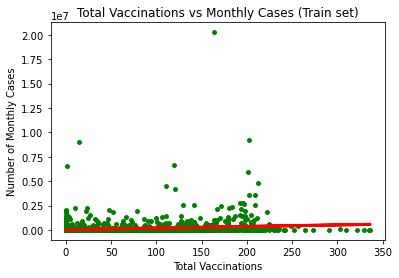

In [42]:
# Visualizing the training set results.
plot_train1 = plt
plot_train1.scatter(X_train1, y_train1, color='green', s = 15)
plot_train1.plot(X_train1, y_predicted_train1, color='red', linewidth =3)
plot_train1.title('Total Vaccinations vs Monthly Cases (Train set)')
plot_train1.xlabel('Total Vaccinations')
plot_train1.ylabel('Number of Monthly Cases')
plot_train1.show()

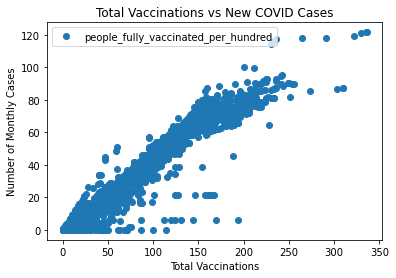

In [43]:
df.plot(x = 'total_vaccinations_per_hundred', y='people_fully_vaccinated_per_hundred',style='o')
plt.title('Total Vaccinations vs New COVID Cases')  
plt.xlabel('Total Vaccinations')  
plt.ylabel('Number of Monthly Cases')  
plt.show()

## Hypothesis 3: The more vaccinations are administered, the more people will be fully vaccinated.

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X3 = df['total_vaccinations_per_hundred'].values.reshape(-1,1)
y3 = df['people_fully_vaccinated_per_hundred'].values.reshape(-1,1)

In [58]:
# Split data into a training set and a test set.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [59]:
# Fit the regression object onto the training set.
regression.fit(X_train3, y_train3)

LinearRegression()

In [60]:
# Predict the values of y using X.
y_predicted3 = regression.predict(X_test3)

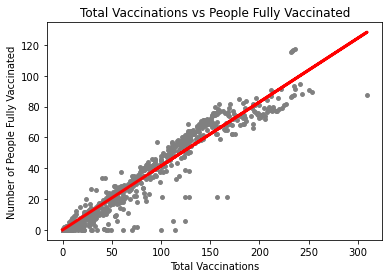

In [61]:
# Create a plot that shows the regression line from the model on the test set.
plot_test3 = plt
plot_test3.scatter(X_test3, y_test3, color='gray', s = 15)
plot_test3.plot(X_test3, y_predicted3, color='red', linewidth =3)
plot_test3.title('Total Vaccinations vs People Fully Vaccinated')
plot_test3.xlabel('Total Vaccinations')
plot_test3.ylabel('Number of People Fully Vaccinated')
plot_test3.show()

In [62]:
# Create objects that contain the model summary statistics.
rmse3 = mean_squared_error(y_test3, y_predicted3)
r2_3 = r2_score(y_test3, y_predicted3)

In [63]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[0.41461552]]
Mean squared error:  29.548083344840634
R2 score:  0.953981033948518


In [64]:
y_predicted3

array([[-2.24924679e-02],
       [ 3.30306570e+01],
       [ 1.14996729e+01],
       ...,
       [-2.24924679e-02],
       [-2.24924679e-02],
       [ 3.83833434e+01]])

In [65]:
# Create a dataframe comparing the actual and predicted values of y.
data3 = pd.DataFrame({'Actual': y_test3.flatten(), 'Predicted': y_predicted3.flatten()})
data3.head(30)

,Actual,Predicted
0,0.00,-0.022492
1,30.69,33.030657
2,13.39,11.499673
3,16.03,20.111237
4,0.00,-0.022492
5,0.00,-0.022492
6,27.11,26.351201
7,0.00,8.323718
8,45.18,41.322967
9,0.00,-0.022492


In [66]:
#Compare how the regression fits the training set
y_predicted_train3 = regression.predict(X_train3)

In [67]:
rmse3 = mean_squared_error(y_train3, y_predicted_train3)
r2_3 = r2_score(y_train3, y_predicted_train3)

In [68]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[0.41461552]]
Mean squared error:  24.946634064987325
R2 score:  0.9591189559959596


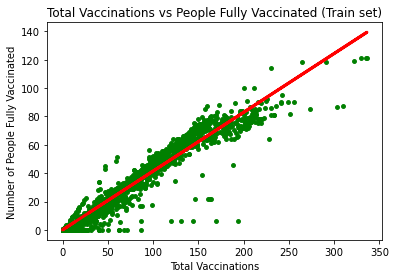

In [69]:
# Visualizing the training set results.
plot_train3 = plt
plot_train3.scatter(X_train3, y_train3, color='green', s = 15)
plot_train3.plot(X_train3, y_predicted_train3, color='red', linewidth =3)
plot_train3.title('Total Vaccinations vs People Fully Vaccinated (Train set)')
plot_train3.xlabel('Total Vaccinations')
plot_train3.ylabel('Number of People Fully Vaccinated')
plot_train3.show()